<a href="https://colab.research.google.com/github/ga0808/sql/blob/main/New%EC%8B%A4%EC%8A%B55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#퀴즈1 - 4번 : 중첩적으로 사용 가능


# 1

SELECT * FROM emp;
# -- 사원 번호가 7인 사원보다 나이가 어린 사원의 모든 컬럼을 조회 하는 쿼리를 작성하세요.
#사원 번호가 7인 사원의 생년월일 --> 서브쿼리로 가져오기
#어린 사원의 모든 컬럼을 조회 --> 서브쿼리로 가져온 7번 사원의 생년월일 보다 늦은 = 큰 생년월일 값을 가진 사원 조회

SELECT * FROM emp
WHERE birthdate >
(
    SELECT birthdate
    FROM emp
    WHERE empnum = 7
);



In [ ]:
# 2
SELECT * FROM emp;
# -- 전 사원의 급여 평균보다 낮은 급여를 받는 사원의 모든 컬럼을 조회 하는 쿼리를 작성하세요.
# 전 사원의 평균 급여 --> 서브쿼리
# 평균 급여보다 낮은 급여 조건 걸기 -> where
# 모든 컬럼 조회

select * from emp
where sal <
(
    select avg(sal)
    from emp
    #전사원 = 모든 데이터 행의 편균이니까 그룹화 하지 않아도 됨
);

# drop table emp;
# drop table dept;


In [ ]:
# 3

SELECT * FROM emp;
#우선 데이터 조회해놓고 시작

# 부서번호가 40인 부서의 급여 평균보다 높게 받는 사원들의 모든 컬럼과 나이를 조회하는 쿼리를 작성해주세요.
# 부서번호가 40인 부서의 급여 평균 > 서브쿼리
# 높게 받는 사원들 > where

SELECT *, FLOOR(
       ( CAST(REPLACE(CURRENT_DATE ,'-','') AS UNSIGNED) -
         CAST(REPLACE(birthdate,'-','') AS UNSIGNED) )
       / 10000 ) as age

#CURRENT_DATE : 현재 날짜를 반환해주는 함수 -> "년-월-일"
#CAST(변환하고싶은 데이터 AS 데이터형식)​
#UNSIGNED : 부호가 없는 64비트 정수로 변환

#FLOOR() : ()내의 값의 소수점 버림 반환
# 왜 할까?
#      20250324 = 2천 25만 324   -   19960101    = 290223 (29만 223)
#      -> 만으로 나누어서 ->  29.0223  -> 자연수는 나이 (29살), 하고 0.0223 세 (소수점은 월및일자 정보 정도가 됨)
#     그래서 FLOOR로 버림해서 나이만 가져옴
#그리고 그결과를 age로 부르고 있음

from emp
where sal > #급여 평균보다 높게 받는 사람들이니까 우선 서브쿼리로 가져오는 연봉값보다 높은 연봉 명시
    (select avg(sal)  #평균 연봉 계산해서 조회하여 반환
    from emp
    where deptno = 40 #부서번호 40으로 조건 걸어줌
    group by deptno #생략 가능
     #사실 우리는 부서 번호 40만을 가지고 있기 때문에
             #그룹화 안해도 됨 부서번호들 끼리 평균 집계해줘야하니까 그룹바이
              #만약 group by 사용할거면 where다음에 group by 사용해야함 > 조건 걸어서 집계에 들어가지 않아야할 사람들은 다 제외해줘야하니까
    )
;


교안으로

In [ ]:
#퀴즈2 - 4 (in은 비교연산 불가)


# https://carami.tistory.com/18

# 실습 4
SELECT * FROM emp;
# -- MANAGER 업무를 가진 사원 중 제일 높은 급여를 받는 사원보다 높은 급여를 받는 사원을 조회하는 쿼리를 작성해주세요.
#매니저 업무를 가진 사원 중 제일 높은 급여를 받는 사원 모른다 ! > 서브쿼리
#그 사원보다 높은 급여 받는 사원 정보들 조회 >  where 조건

#첫번째 답 쿼리
 #매니저 사원 중 제일 높은 급여를 조건으로 (다중행 연산자 안써보기)
select *
from emp
where sal >  #매니저 업무를 가진 사원 중 제일 높은 급여보다 커야 함
    (select MAX(sal) #제일 높은 급여
    from emp
    where job = 'MANAGER' #매니저 업무 조건
    )
;

#두번째 답 쿼리 (다중행 연산자 사용해보자)

#잡이 매니져인 사원들의 연봉을 -> 서브쿼리로 가져오고
#서브쿼리로 가져온 사원들의 모든 연봉 값 보다 크면 = 매니저 잡인 사람들의 모든 연봉 값이 30,40,50 인데 이 모든 값보다 크다면
#최대값(50) 보다 큰 것 -> 서브쿼리에 all사용하여 조건문 작성
select *
from emp
where sal > ALL
    (select sal
    from emp
    where job = 'MANAGER'
    )
;


교안으로

In [ ]:
# 실습 7

# -- salaries 테이블에서 from_date가 2000-12-31 이전인 사람들의 급여 중 => 서브 뭐리
# '하나의 급여' 보다 더 적은 급여를 받은 직원의 급여 정보를 모두 출력 -> 메인 쿼리
# 12.31 이전 사람들의 급여(서브쿼리로 조회한 급여중)에 대한 어떠한 데이터 들 중, 더 적은 급여
#    -> 최대 급여 하나보다 적기만 해도 되겠다
#     -> any() , <  사 용
SELECT * FROM salaries
WHERE salary < ANY(
    SELECT salary
    FROM salaries
    WHERE from_date < '2000-12-31'
    );

# -- salaries 테이블에서 from_date가 2000-12-31 이전인 사람들의 급여 중
# 모든 급여보다 적은 급여를 받은 직원의 급여 정보를 모두 출력해보세요. -> ALL(), <
# <all() -> 최소 급여보다 작아야 모든 급여보다 작을 수 있음
SELECT * FROM salaries
WHERE salary < ALL(
    SELECT salary
    FROM salaries
    WHERE from_date < '2000-12-31'
    );

교안으로

In [ ]:
#퀴즈3 - 2

In [ ]:
#실습 8 - SELECT 절에서 서브쿼리 사용해보기
# -- salaries 테이블에서 직원 번호와 한 직원의 평균 급여를 중복없이 출력해보세요.

#SELECT에서 사용하는 서브쿼리는 > 1행,1열을 반환하는 스칼라 서브쿼리만 사용가능 !
#이유 : SELECT 문에는 조회하고 싶은 컬럼명이 하나씩 나열되며 - 해당 컬럼의 행이 하나씩 순차적으로 조회됨
#     때문에 서브쿼리로 조회된 데이터도 컬럼하나여야 하고 - 서브쿼리로 하나씩 행 단위로 순차적으로 연산되어 조회될 것임

#직원 번호와 직원 별 평균 연봉을 조회하고 싶음
#직원별 평균 연봉은
  #groupby? : 불가 : 한번에 여러행의 연산 결과가 나옴
  #조건에 메인쿼리에서 수행하고 있는 현재 행의 직원 번호(emp.no)이
  #     같은 행들을 가져와서 평균을 집계하여 > 하나의 값이 나올 수 있도록 진행
SELECT DISTINCT emp_no, (
    SELECT AVG(salary)
    FROM salaries AS sub
    #메인쿼리의 select문에서 현재 조회하고 있는 emp_no과 같은 emp_no의 행들만 가져올 수 있도록
    #근데 이때 동일한 테이블을 메인과 서브쿼리에 사용하고 있다면, 서브쿼리 또는 메인쿼리의 별칭을 지정해줘야함 - 구분할 수 있게
    #동일테이블의 컬럼에 대해서 조건을 주면 항상 참이 나올 것이기 때문에
    #다른 테이블의 정보라고 인지시켜서 제어할 수 있도록 진행
    WHERE sub.emp_no = salaries.emp_no
) AS avg_salary
FROM salaries

In [ ]:
#1. 중간고사 수학왕

#두 테이블 조인해서
#학번 10504인 경민이보다 중간고사 수학점수를 높거나 같게 받은 학생들을 조회해 주세요.

#경민이 중간고사 수학점수 모름 -> 구해야겠다
#구해서 -> 학생들 수학점수들이랑 비교해서 - 조건 충족하는 학생들의 데이터(행)만 추출
#-> where문 서브쿼리

#어떤 조인 해야하는지 보기위해 데이터 개수랑 요약 확인
DESC students;

SELECT COUNT(*)
FROM students
;

DESC middle_test;

SELECT COUNT(*)
FROM middle_test
;

#각 학생 아이디 기본키라 (중복,널값 없음) + 데이터 개수 동일
#누락된 데이터 없을 것이라고 생각 듦
#학생 id로 inner join 수행

#모든 정보 = 모든 컬럼 조회
select *
#출력 예시 보면, 성적 테이블 컬럼들 부터 나와야함
from middle_test
inner join students
#학생 아이디 기준으로 조인
on students.student_id = middle_test.student_id
#경민학생 보다 중간고사 수학점수 같거나 높은 학생 -> where
#학생의 수학점수가 - 서브쿼리로 반환 받은 경민학생 수학점수보다 같거나 높은 학생
where middle_test.math >= (
    select math #경민 학생의 수학점수만 가져오기
    from middle_test
    where student_id = 10504 #경민 학생 학번으로 특정 지어서 조건 걸기
);
#추가로 where 절의 서브쿼리는
#서브쿼리 자체도 조건으로 해당되기 때문에 별칭 지정 불가
#별칭 지정해도 사용할 수 있는 상황이 존재하지 않음

                  ## 나를 위해
                  #서브쿼리내 별칭 지정한건, 서브쿼리도 별칭을 지정해서
                  #예를들면, 서브쿼리내에 math를 mt라고 하고
                  #지금 where 절에 있는 서브쿼리를 mm이라고 한다면
                  #mm.mt로 메인 쿼리에서 사용할 수 있다
                  #하지만 조건절에서의 서브쿼리는 별칭을 가질 수 없기 때문에 지금 해당 쿼리에서는 못함

In [ ]:
# 실습 5 - from 절의 서브쿼리


# -- 각 부서별 최고 연봉 사원들을 조회하는 쿼리를 작성해주세요.
#부서별로 최고 연봉 구하기 - 구해서 각 사원이 속한 부서별 최고 연봉과 같은 연봉인 사원들 조회
#emp 테이블의 모든 컬럼들 조회 (부서별로 최고 연봉 구한 데이터는 조회 안함)


SELECT emp.* #그냥 *해도 됨 - 어차피 FROM 에서 테이블 emp 밖에 없어서
FROM emp
WHERE emp.sal = (
    SELECT MAX(sal)
    FROM emp e2
    WHERE emp.deptno = e2.deptno
)


#from절 서브쿼리로 진행해볼까?
#From절에서 서브쿼리는 별칭이 필수 적임
  #서브쿼리에서 테이블에 별칭을 부여하지 않으면,
  #메인 쿼리에서 서브쿼리 결과를 참조할 때 어떤 결과를 가리키는지 모호해질 수 있기 때문

select e1.*
from emp as e1,
    (select deptno, max(sal) as max_sal
    #사원 번호랑 부서별 연봉 최대값 조회하여 반환
    from emp
    group by deptno #부서별로 묶어서
    ) as e2 #해당 조회 결과(n행 2열) 테이블을 e2로 부름
#사원이 속한 각 부서의 - 최고 연봉과 같은지 조회
where e1.deptno = e2.deptno  #부서 번호 같으면서
and e1.sal = e2.max_sal #사원의 연봉이 최고 연봉 같을 경우
;


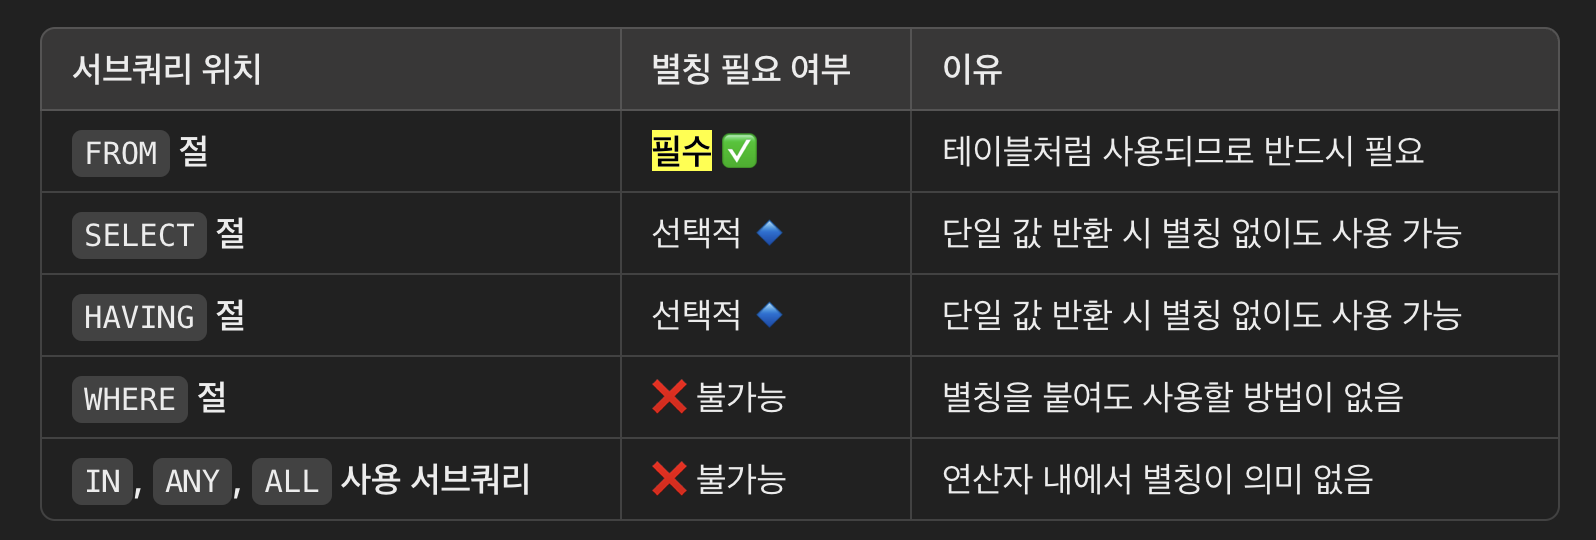

In [ ]:
# 끝

In [ ]:
#실습 6 - FROM 절의 서브쿼리


#FROM 절에서 서브쿼리를 사용할 때는 반드시 별칭을 붙여야 함!
#     서브쿼리의 결과를 임시 테이블처럼 다루기 때문에,
#     그 결과에 대해 참조할 수 있는 별칭을 지정해야함


select *
from emp as e1,
    (select deptno, min(birthdate) as min_birthdate
    from emp
    group by deptno
    ) as e2
;

In [ ]:
# 실습 6

# -- 각 부서별 나이가 제일 많은 사원을 조회하는 쿼리를 작성해주세요.

#문제에 조금의 결함이 있음
#1) 부서별 나이가 제일 많은 사원 = 부서별로 나이 가장 많은 사람 구하고, 그 부서별로 각 최대 나이와 비교해야함
#2) 근데 여기서는 각 부서의 최대 나이를 구하고, 그냥 모든 사원들이 부서별 최대 나이와 같으면 그냥 조회
#보통 1번의 문제 의도로 파악되나, 문제가 2번의 의도에 대한 쿼리를 작성하는 것을 의도로 함 ㅎㅎ

# 부서별 최대 나이 -> 서브쿼리로 구하자
# 구한 각 부서 최대 나이와 - 각 사원들의 나이를 비교하여, 나이가 같으면 조회

select * from emp
where birthdate in
(
    select min(birthdate) #나이가 많으면 = 생년월일 값이 작은 값
    from emp
    group by deptno desc #그룹화한 컬럼을 기준으로 desc(내림차순)도 가능함  - A<Z<a<z
);

#해당 데이터에서는 이렇게만 해도 각 부서별로 나이가 제일 많은 사원을 조회할 수 있는데
#a부서 최대나이 90, b부서 최대 나이 80인데
#만약 b 부서에서도 90세가 있으면
#b부서의 90세도 조회가 되어버리는 문제가 발생함

# 시간 남으면 아래 쿼리 작성하기 ================================
#이러한 문제가 있다는 것만 알고 시간 관계상 넘어가겠음
#시간이 된다면 추후 다중 컬럼 서브 쿼리에 대한 내용을 배우고 다시 돌아와서 살펴보겠음



이제 챕터 실습 6으로 넘어가서 실습 3 ~ 퀴즈 4까지 모두 풀면서 복습하기  

In [ ]:
아래부터 심화 서브쿼리

In [ ]:
# 실습 1











In [ ]:
# 퀴즈2 - 3
# 엘리스와 같은 부서 id와 같은 사원들의 이름을 찾기

In [ ]:
# 실습 4

# -- 아래는 REQUEST, REQUEST_DTL 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC REQUEST;
DESC REQUEST_DTL;

#이번엔 failed 상태인 요청 Id가 여러개 -> 조회해보면 3개
SELECT request_id
FROM REQUEST
where request_status = 'FAILED'
;

# -- 요청상태가 FAILED인 요청ID를 구하고, 해당 요청들에 대한 요청상세 정보를 조회하는 쿼리를 작성해보세요.
SELECT request_dtl_id, request_id, request_name, request_content
FROM REQUEST_DTL
WHERE request_id IN (
    SELECT request_id
    FROM REQUEST
    where request_status = 'FAILED')
ORDER BY request_dtl_id ASC #오름차순 정렬
;

In [ ]:
# 실습 6

# -- 아래는 EMPLOYEE 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC EMPLOYEE;

# -- 1. 직급이 '사원'인 직원의 급여를 조회하는 쿼리를 작성해봅시다.
select salary from EMPLOYEE
where position = '사원'
order by salary asc;

# -- 2. 앞에서 작성한 쿼리와 ALL을 이용하여,
# 모든 사원들의 급여보다 -> 서브 쿼리
# 높거나 같은 급여를 가진 직원 -> 서브 쿼리의 모든 결과들 보다 높거나 같아야함 -> >= all()
# 정렬 -> order by
# 특정 컬럼들 조회하는 쿼리
select employee_id, salary, position
from EMPLOYEE
where salary >= ALL(
    SELECT salary from EMPLOYEE
    where position = '사원'
)
order by employee_id asc;

In [ ]:
# 실습 7

# -- 아래는 FOOD 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC FOOD;

# -- 음식타입이 Main인 임의의 음식의 가격보다 비싼 음식들을 조회
#음식 타입이 "Main"인 음식의 가격 조회하기 -> 서브쿼리
#임의의 음식 가격보다 비싼 음식들 -> 서브쿼리에 조회된 음식들 중 하나의(임의의) 가격보다 값이 높아야함 -> any()

#서브쿼리로 놓을 메인 음식들 가격 조회해보기 -> 결과 3개 나옴
SELECT price FROM FOOD
WHERE food_type='Main'
;

#이 3개의 결과의 값 보다 높은 값의 음식들의 정보를 조회해야함
SELECT food_id, food_type, food_name, price
FROM FOOD
WHERE price > ANY(
    SELECT price FROM FOOD
    WHERE food_type='Main'
)
ORDER BY food_id asc
;

In [ ]:
# 실습 8

# -- 아래는 BOOK, BOOK_STOCK 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC BOOK;
DESC BOOK_STOCK;

# -- BOOK_STOCK 테이블에서 재고가 1이상인 데이터의 책이름, 책작가 정보를 조회후 -> 서브쿼리
# 책 이름이 같을 경우를 대비하여 - 책 이름,작가 2가지를 비교하여 조회 -> 다중 컬럼 조회
# BOOK테이블에 IN을 활용하여 조회하는 쿼리를 작성해봅시다. -> 위 다중 컬럼 서브쿼리로 조건 걸기
# 정렬'

SELECT book_id, book_name, book_writer, price
from BOOK
where (book_name, book_writer) IN(
    SELECT book_name, book_writer
    FROM BOOK_STOCK
    WHERE stock >= 1
)
order by book_id asc;

In [ ]:
# 퀴즈 4 - 4
#in, exists : 뒤의 서브쿼리 결과에 우리가 찾는 데이터가 있는지
#all : 조건을 모두 만족해야함
#any : 조건을 만족하는 것이 하나 이상이면 됨

교안으로

In [ ]:
# 실습 10
# -- 아래는 EMPLOYEE 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC EMPLOYEE;

# 우선은 뷰로 만들 쿼리문 작성해보기
SELECT employee_id, salary
FROM EMPLOYEE
WHERE department_name = '개발'
;
#정상적으로 테이블 조회되는 거 확인했으면
#조회되는 이 테이블을 뷰로 만듦
#뷰 -> 물리적 공간엔 존재하지 않지만, 논리적 공간에서 존재하므로
#     보여주기 위한 가상의 테이블임


# -- 1. 부서이름이 '개발'인 직원의 직원ID, 급여 정보를 가지는 뷰(EMPLOYEE_DEV)를 만드는 쿼리를 작성해봅시다.
CREATE VIEW EMPLOYEE_DEV AS (
  SELECT employee_id, salary
  FROM EMPLOYEE
  WHERE department_name = '개발'
);

# -- 2. 위에서 만든 뷰(EMPLOYEE_DEV)의 모든 데이터를 조회하는 쿼리를 작성해봅시다.
SELECT * FROM EMPLOYEE_DEV;

In [ ]:
# 퀴즈 6 - 4

# 물리적 공간에 저장되어 있는 테이블 구조가 변경되더라도
# 뷰 같은 경우에는 논리적 공간에 만들어진 가상의 테이블이기 때문에
# 테이블 구조의 변경에 영향을 받지 않고 동일한 결과를 조회할 수 있게 해줌
# (뷰를 만들었을때의 테이블 구조에 대한 내용을 담고 있기 때문에)
# -> 그래서 뷰를 통해 복잡한 데이터 베이스 구조를 감추고
# -> 웹이나 앱 등의 어플리케이션이나 유저들에게 일관되게 데이터를 제공할 수 있음



In [ ]:
print(1)

In [ ]:
# -- 아래는 STORE 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC STORE;

# -- 1. 남부 지역 가게들의 매출액을 조회하는 쿼리를 작성해봅시다.
SELECT sales_amount
FROM STORE
WHERE store_location = '남부'
ORDER BY sales_amount asc;


# -- 2. 남부 지역의 모든 가게보다 매출이 높은 가게를 조회하는 쿼리를 작성해봅시다.
SELECT store_id, store_name, store_location, sales_amount
FROM STORE
WHERE sales_amount > ALL(
    SELECT sales_amount
    FROM STORE
    WHERE store_location = '남부')
ORDER BY store_id asc;

In [ ]:
# -- 아래는 ELICE_MART 테이블에 대한 구조를 보여줍니다. 테이블을 수정하실 필요는 없습니다.
DESC ELICE_MART;
DESC PRODUCT;

# -- 1. ELICE_MART 에서 재고가 0인 상품에 대해 조회하는 쿼리를 작성하세요.
SELECT product_id, product_name
FROM ELICE_MART
WHERE stock = 0
ORDER BY product_id asc;

# -- 2. ELICE_MART 에서는 재고가 0이고, PRODUCT 에서는 재고가 0 초과인 상품에 대해 조회하는 쿼리를 작성하세요.
SELECT product_id, product_name
FROM ELICE_MART
WHERE stock = 0
AND (product_id, product_name) IN (
    SELECT product_id, product_name
    FROM PRODUCT
    WHERE stock > 0)
ORDER BY product_id asc;

In [ ]:
# SELECT * FROM emp;
# -- 전 사원의 급여 평균보다 낮은 급여를 받는 사원의 모든 컬럼을 조회 하는 쿼리를 작성하세요.
# SELECT *
# FROM emp A
# WHERE EXISTS(
#     SELECT *
#     FROM emp B
#     WHERE  A.deptno = B.deptno
#     AND B.sal >= 2900
# );
